# W1M1 - mtcars 데이터셋 분석하기

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 같은 디렉토리 파일을 통한 mtcars 
df = pd.read_csv('mtcars.csv')

### head 출력

In [ ]:
# 위에서 5개의 데이터 출력
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### tail 출력

In [ ]:
# 아래에서 5개의 데이터 출력
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


### shape method를 이용해서 데이터의 갯수(row count) 출력

In [ ]:
# (행, 열)형태의 튜플로 존재하는 데이터 모양 출력
df.shape[0]

32

### column method를 이용하여 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경

In [ ]:
# 데이터 열 이름 확인
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [ ]:
# Unnamed : 0 -> model로 column이름 변경 이후 열 이름 재출력
df = df.rename(columns={'Unnamed: 0' : 'model'})
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

### info 출력

In [ ]:
# 데이터 수, 타입, Null의 개수 등을 간략하게 보여준다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### dtypes출력

In [ ]:
# df의 데이터 타입 출력
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

### describe 출력

In [ ]:
# 데이터 컬럼 별 평균, 최대, 최소 등 통계값을 보여준다
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### gear, transmission features에는 각각 몇가지 값이 있는지 출력

In [ ]:
# nunique() -> 데이터 열의 고유값들의 개수를 반환한다. 
gear = df['gear'].nunique()
transmission = df['am'].nunique()
print(f"gear : {gear}, transmission : {transmission}")

gear : 3, transmission : 2


### (crosstab 사용)gear, transmission의 경우의 수 조합별로 나누고 각 조합에 몇 개의 차량이 있는지 출력

In [ ]:
# crosstab 두 개 이상의 변수의 관계를 조사할 수 있다.
gtc = pd.crosstab(df['gear'], df['am'] )
gtc

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


### (crosstab 미사용)gear, transmission의 경우의 수 조합별로 나누고 각 조합에 몇 개의 차량이 있는지 출력

In [ ]:
# groupby를 통해 데이터를 그룹화 하여 연산 수행
gt = df.groupby(['gear', 'am']).size().reset_index(name='count')
gt

,gear,am,count
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


### 조합 별 결과값을 바 그래프로 나타내기

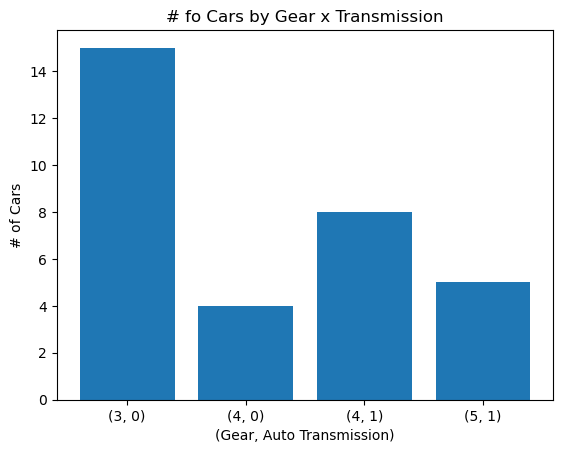

In [ ]:
# lab
label = list(zip(gt['gear'], gt['am']))
plt.bar(range(len(gt)), gt['count'])
plt.title('# fo Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.xticks(range(len(gt)), label)
plt.show()

### 데이터셋에 포함된 모든 features의 히스토그램 그리기

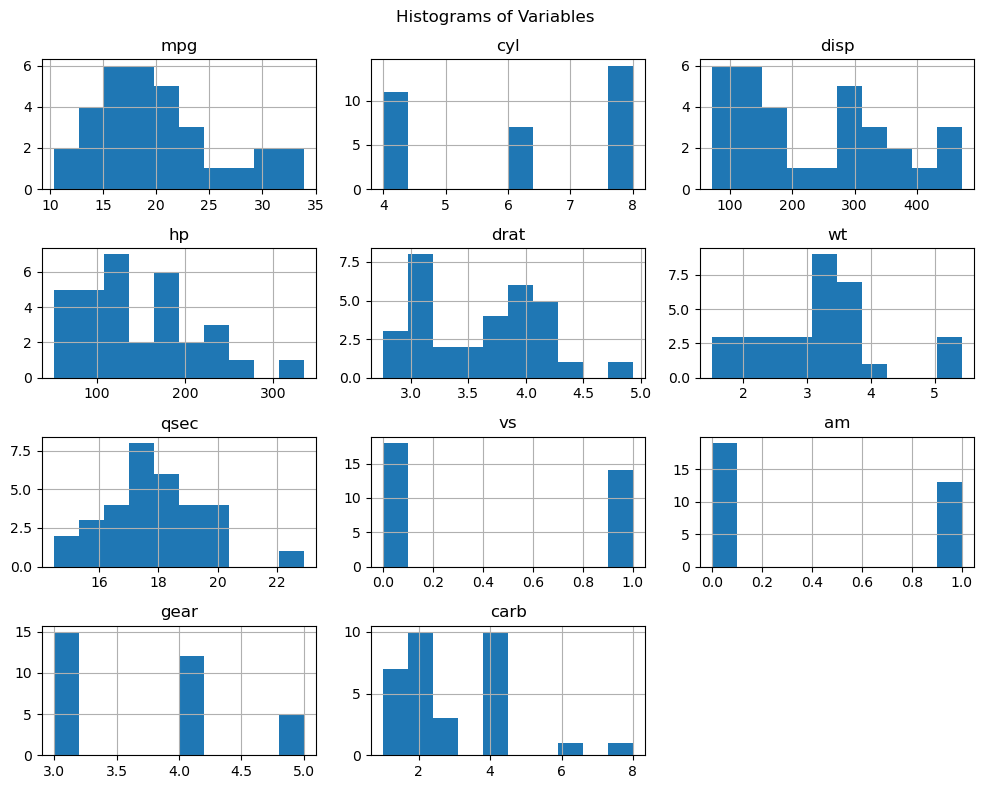

In [ ]:
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Variables')
plt.tight_layout()

### Cylinder와 HorsePower간의 상관 관계를 알아보기 위해 scatter 차트 그리기

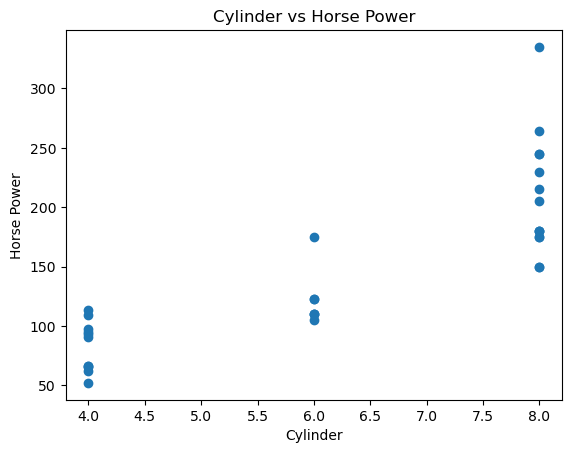

In [ ]:
plt.scatter(df['cyl'], df['hp'])
plt.title("Cylinder vs Horse Power")
plt.xlabel('Number of Cylinders')
plt.ylabel('Gross HorsePower')
plt.show()

### MPG와 HorsePower간의 상관 관계를 알아보기 위한 scatter 차트 그리기

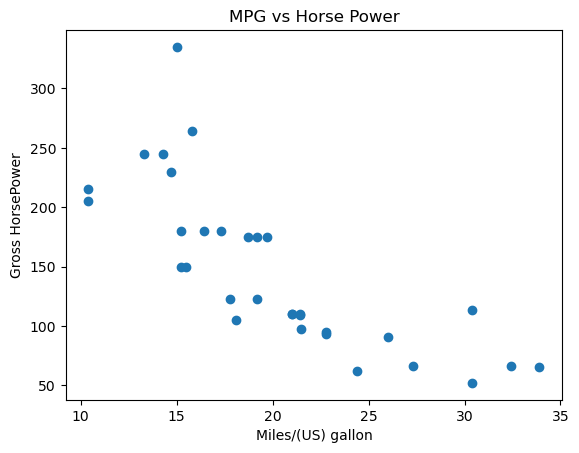

In [113]:
plt.scatter(df['mpg'], df['hp'])
plt.title("MPG vs Horse Power")
plt.xlabel('Miles/(US) gallon')
plt.ylabel('Gross HorsePower')
plt.show()

### 각 변수들 간의 상관관계를 알아보기 위해 상관계수를 구하는 표를 출력하세요

In [ ]:
# 모델명 열은 변수가 아니기 때문에 삭제
del df['model']

### 양, 음의 상관관계 시각화

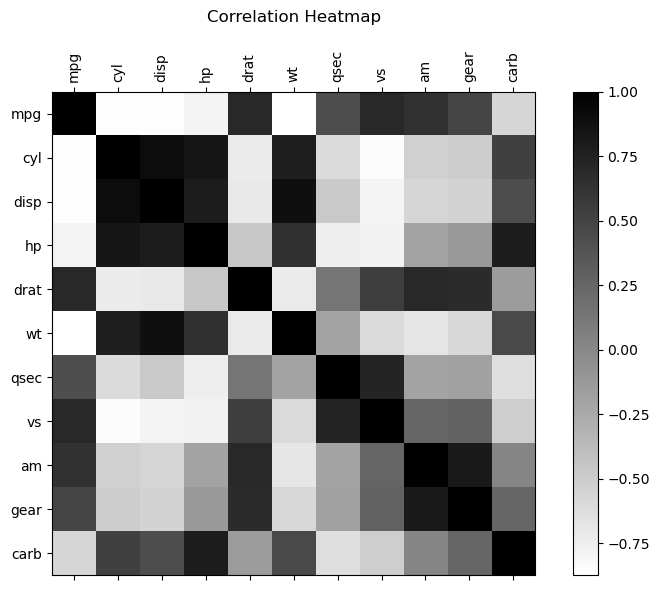

In [165]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='gray_r')
fig.colorbar(cax)
ticks = range(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title('Correlation Heatmap', pad=20)
plt.tight_layout()
plt.show()

### 상관관계(절댓값으로 존재 여부 및 강도 판단)

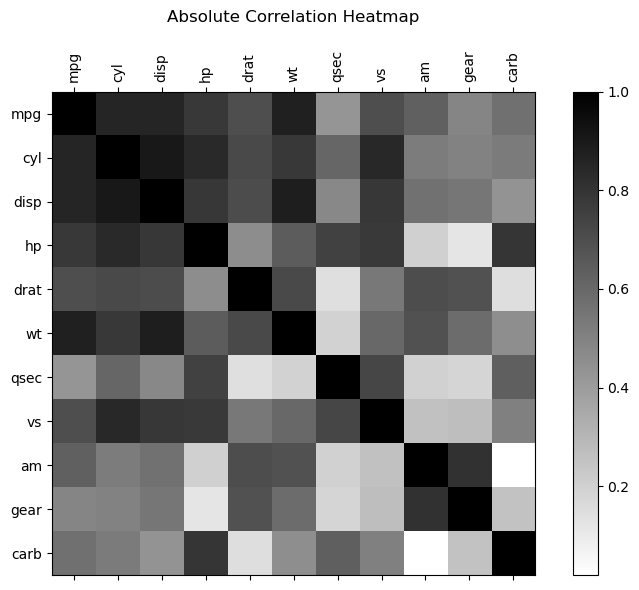

In [166]:
corr = df.corr().abs()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='gray_r')
fig.colorbar(cax)
ticks = range(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title('Absolute Correlation Heatmap', pad=20)
plt.tight_layout()
plt.show()

### 상관관계가 높은 변수들 중 이산형 변수가 존재하는지 판단하는 scatter matrix

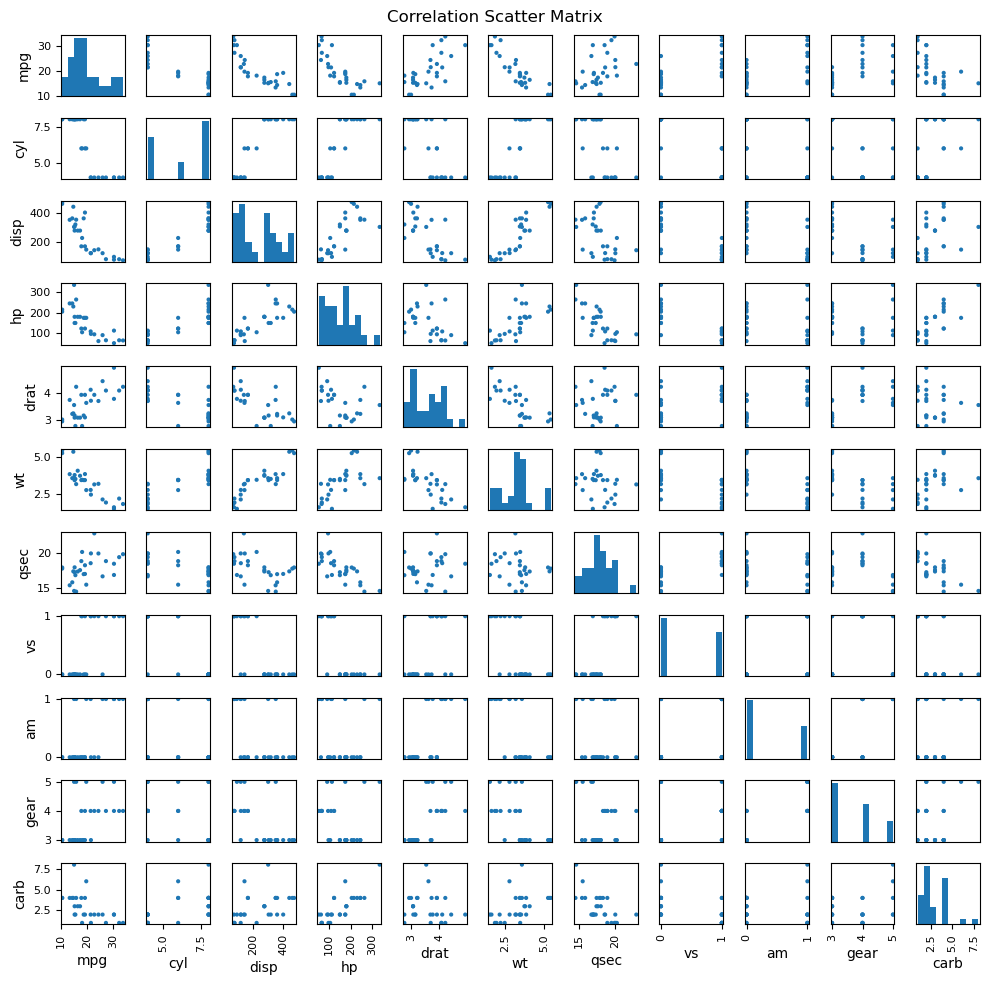

In [205]:
pd.plotting.scatter_matrix(df, figsize = (10, 10), alpha=1)
plt.suptitle('Correlation Scatter Matrix')
plt.tight_layout()
plt.show()

## 팀 활동 결과

### 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

- 목적에 맞는 신차 개발에 도움이 될 수 있다.

    - 변수 간의 상관관계를 이용해 목적에 맞는 차량 스펙(연비, 마력 등)에 맞도록 차량 설계(실린더 개수, 엔진 종류 등)를 할 수 있다
    
    - 즉, 마력이 중요한 차량을 만들 때는 좋은 엔진, 많은 실린더, 기화기 개수, 적은 중량의 영향을 받는다는 것을 알 수 있고, 더 나아가 상관계수의 절댓값을 이용해 마력에 더 많은 영향을 주도록 실린더와 기화기 갯수를 먼저 늘리는 차량 설계를 해야 함을 알 수 있다. 

- 중고차 스펙 확인 및 차량 이상탐지

    - 만약 한 차량에 대한 데이터를 많이 수집하였을 경우 차량 스펙에 대한 히스토그램을 통해, 시장에 올라온 중고차의 스펙이 현저하게 낮다면 고장을 의심할 수 있다. 이 때, 위의 상관관계 히스토그램을 통해 어느 부분이 망가졌는지 더욱 빠르게 추론하고 수리 시간을 효율적으로 줄일 수 있다.

    - 예를 들어, 마력이 안좋아졌을 경우 상관관계를 통하여 더 많은 영향을 주는 실린더, 기화기와 같은 차량 부품을 우선 점검하여 수리 시간을 획기적으로 줄일 수 있다.

- 차량의 예상 성능과 필요부품 예측

    - 앞의 두 예시와 비슷하게, 데이터가 많이 쌓이면 차량 하나의 스펙을 보고도 차량 설계를 어떤 식으로 진행했는지 알 수 있고, 어떠한 점을 보완하면 이전 모델보다 연비가 몇 퍼센트 증가했는지도 수치를 통해 알 수 있기 때문에, 마케팅적인 부분에서도 좋다.

### 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

##### 실린더 개수와 배기량의 상관관계

- 다른 차량 설계 요소에 따라 편차가 존재하긴 하지만 확실하게 실린더 개수에 따라 우상향하는 그래프를 보여준다. 배기량은 실린더가 움직일 때, 흡입, 배출되는 공기량을 의미하기 때문에 실린더가 많아질 수록 배기량이 많아지는 것은 어떻게 보면 당연한 결과이다. 또한 scatter map에 보이는 편차는 실린더 자체 크기의 차이 때문이라고 생각한다. 

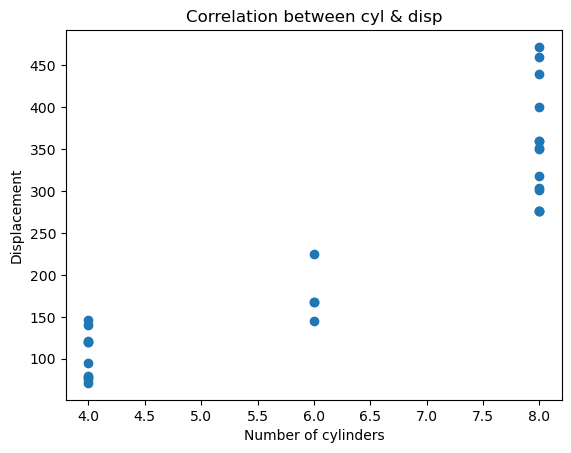

In [207]:
plt.scatter(df['cyl'], df['disp'])
plt.title("Correlation between cyl & disp")
plt.xlabel('Number of cylinders')
plt.ylabel('Displacement')
plt.show()

##### 배기량과 연비의 상관관계

- 실린더 개수는 이산적으로 정해져 있었기 때문에 상관관계가 눈에 잘 보이지 않았지만, 배기량과 연비의 관계는 명확하게 음의 상관관계를 띠고 있다는 점을 알 수 있다. 배기량(흡기량)에 비례하여 연료를 분사하여 차량이 움직이는 에너지를 생성하므로, 배기량이 많을 수록, 사용하는 에너지가 많아져 연비가 안좋아질 수밖에 었다.

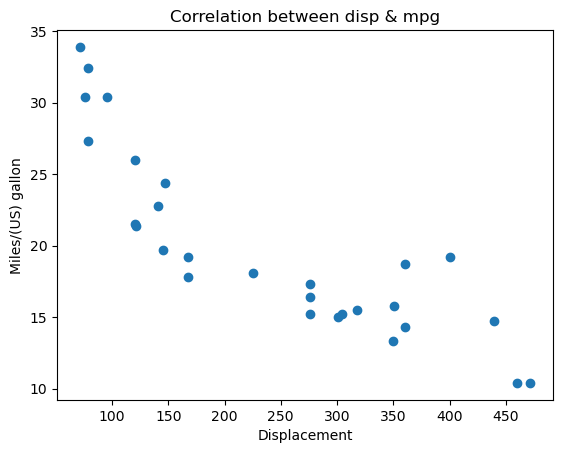

In [208]:
plt.scatter(df['disp'], df['mpg'])
plt.title("Correlation between disp & mpg")
plt.xlabel('Displacement')
plt.ylabel('Miles/(US) gallon')
plt.show()

### 결론

차량 설계 부품 중 하나인 실린더의 개수와 배기량이 상관관계에 있고 배기량은 연비에 상관관계가 있기 때문에 차량을 개발할 때 변경할 수 있는 부분인 실린더를 통해 연비를 조절할 수 있다는 결과가 나온다. 차량을 설계할 때, 높은 상관관계를 지니는 변수를 통하여 효율적으로 차량 스펙을 조정할 수 있을 것이라는 결론이 나온다.